<a href="https://colab.research.google.com/github/Dicki-ibnu/CleansingData/blob/main/2318118_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Import Library

Langkah pertama yaitu mengimpor semua pustaka Python yang diperlukan untuk analisis. Kita akan menggunakan pandas dan numpy untuk manipulasi data, serta matplotlib dan seaborn untuk visualisasi.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", palette="muted", font_scale=1.1)
plt.rcParams['figure.figsize'] = (8,4)

print("Library berhasil diimpor.")

Library berhasil diimpor.


#2. Menghubungkan Google Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#3. Load Dataset

Berikutnya, kita akan memuat kedua file Excel yang sudah disiapkan sebelumnya. Tujuannya adalah untuk melihat ukuran data dan memastikan file terbaca dengan benar.

In [5]:
df1 = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/data_bersih.xlsx')
df2 = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/jobstreet_cleaned_fixed.xlsx')

print("Dataset 1 (data_bersih):", df1.shape)
print("Dataset 2 (jobstreet_cleaned_fixed):", df2.shape)

Dataset 1 (data_bersih): (472, 10)
Dataset 2 (jobstreet_cleaned_fixed): (464, 13)


#4. Melihat data

Langkah ini untuk menampilkan beberapa baris pertama dari setiap dataset, agar kita mendapat gambaran awal tentang isi dan struktur kolom.

In [6]:
print("Info Dataset 1:")
df1.info()
print("\nMissing value Dataset 1:")
print(df1.isnull().sum())

print("\nInfo Dataset 2:")
df2.info()
print("\nMissing value Dataset 2:")
print(df2.isnull().sum())


Info Dataset 1:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 472 entries, 0 to 471
Data columns (total 10 columns):
 #   Column                                                                Non-Null Count  Dtype 
---  ------                                                                --------------  ----- 
 0   Nama Lengkap                                                          463 non-null    object
 1   Usia/Umur                                                             463 non-null    object
 2   Jenis Kelamin                                                         463 non-null    object
 3   Pekerjaan saat ini                                                    463 non-null    object
 4   Hobi Yang Anda Minati                                                 461 non-null    object
 5   Gaji Yang Anda Inginkan                                               472 non-null    int64 
 6   Apakah Anda Lebih Suka Bekerja Di Desa Atau Di Kota                   472 non-null    obje

#6. Perbandingan Gaji dan realita

Untuk membandingkan distribusi gaji antara dua sumber data: harapan responden dan gaji nyata di JobStreet. Fungsi plt.figure(figsize=(10,5)) mengatur ukuran grafik agar mudah dibaca

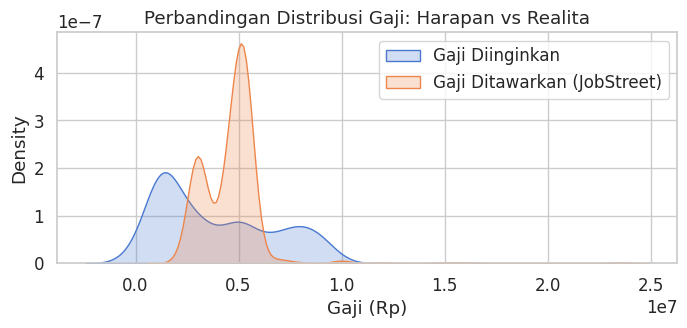

In [8]:
plt.figure(figsize=(8,3))
sns.kdeplot(df1["Gaji Yang Anda Inginkan"], fill=True, label="Gaji Diinginkan")
sns.kdeplot(df2["salaryMin"], fill=True, label="Gaji Ditawarkan (JobStreet)")
plt.title("Perbandingan Distribusi Gaji: Harapan vs Realita")
plt.xlabel("Gaji (Rp)")
plt.legend()
plt.show()


#7. Minat Bidang vs Ketersediaan Lowongan

Kita cocokkan bidang yang diminati responden dengan kategori pekerjaan yang tersedia.

/tmp/ipython-input-1367422739.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_interest.values, y=top_interest.index, ax=axes[0], palette="Blues_r")
/tmp/ipython-input-1367422739.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_jobs.values, y=top_jobs.index, ax=axes[1], palette="Greens_r")


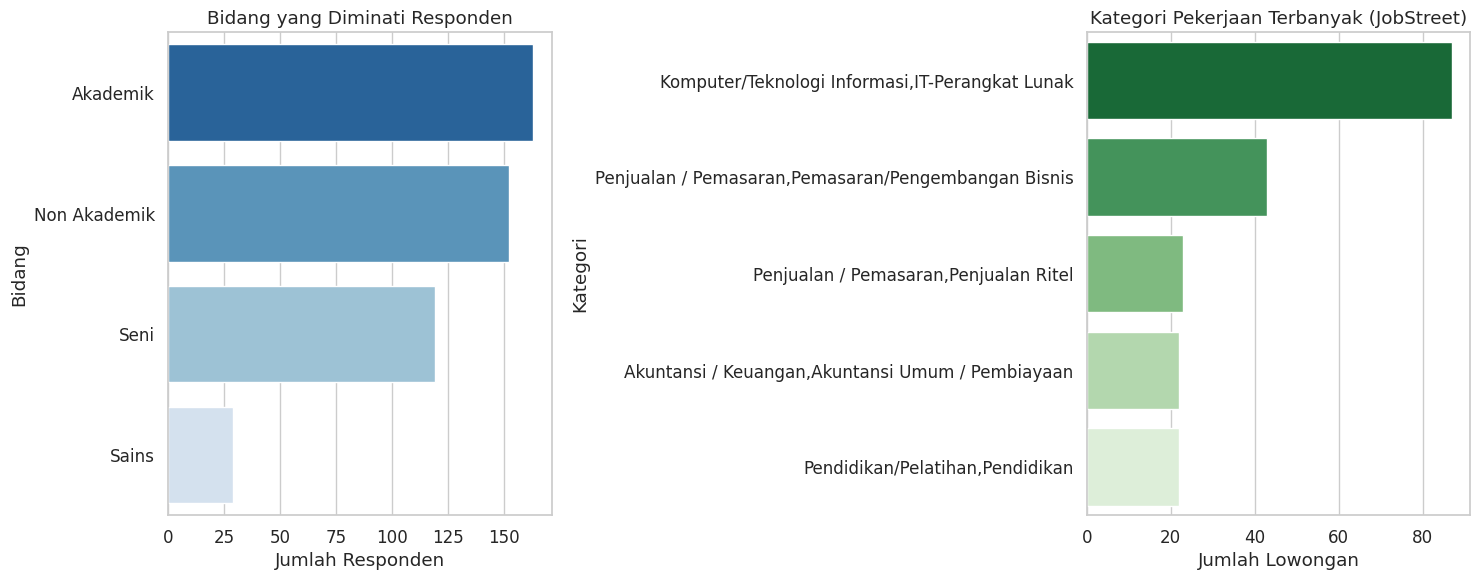

In [13]:
# Hitung 5 bidang paling diminati responden
top_interest = df1["Anda Lebih Tertarik Pada Bidang?"].value_counts().head(5)

# Hitung 5 kategori pekerjaan terbanyak di JobStreet
top_jobs = df2["categoriesName"].value_counts().head(5)

# Visualisasi berdampingan
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

sns.barplot(x=top_interest.values, y=top_interest.index, ax=axes[0], palette="Blues_r")
axes[0].set_title("Bidang yang Diminati Responden")
axes[0].set_xlabel("Jumlah Responden")
axes[0].set_ylabel("Bidang")

sns.barplot(x=top_jobs.values, y=top_jobs.index, ax=axes[1], palette="Greens_r")
axes[1].set_title("Kategori Pekerjaan Terbanyak (JobStreet)")
axes[1].set_xlabel("Jumlah Lowongan")
axes[1].set_ylabel("Kategori")

plt.tight_layout()  # Atur jarak agar tidak tumpang tindih
plt.show()


#8. Analisis Lokasi

Apakah responden lebih suka bekerja di kota atau desa, dan di mana lowongan terbanyak?

/tmp/ipython-input-3971906961.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pref_lokasi.values, y=pref_lokasi.index, ax=axes[0], palette="cool")
/tmp/ipython-input-3971906961.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=lokasi_terbanyak.values, y=lokasi_terbanyak.index, ax=axes[1], palette="coolwarm")


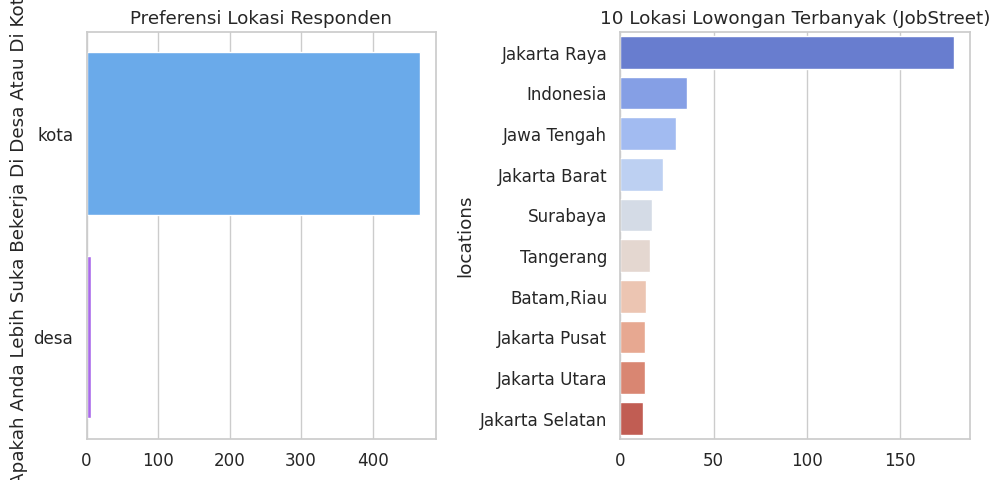

In [15]:
# Dataset 1: preferensi lokasi
pref_lokasi = df1["Apakah Anda Lebih Suka Bekerja Di Desa Atau Di Kota"].value_counts()

# Dataset 2: lokasi lowongan
lokasi_terbanyak = df2["locations"].value_counts().head(10)

fig, axes = plt.subplots(1, 2, figsize=(10,5))
sns.barplot(x=pref_lokasi.values, y=pref_lokasi.index, ax=axes[0], palette="cool")
axes[0].set_title("Preferensi Lokasi Responden")

sns.barplot(x=lokasi_terbanyak.values, y=lokasi_terbanyak.index, ax=axes[1], palette="coolwarm")
axes[1].set_title("10 Lokasi Lowongan Terbanyak (JobStreet)")
plt.tight_layout()
plt.show()


#9. Korelasi Usia dengan Gaji yang Diinginkan

Kode ini membuat salinan data, lalu mengekstrak angka dari kolom “Usia/Umur” agar bisa dianalisis secara numerik. Setelah itu, dibuat grafik scatter plot untuk melihat hubungan antara usia responden dan gaji yang mereka inginkan, sehingga bisa diketahui apakah semakin tua usia berhubungan dengan kenaikan harapan gaji

<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipython-input-1169011553.py:2: SyntaxWarning: invalid escape sequence '\d'
  df1_clean["Usia/Umur"] = data1_clean["Usia/Umur"].astype(str).str.extract("(\d+)").astype(float)


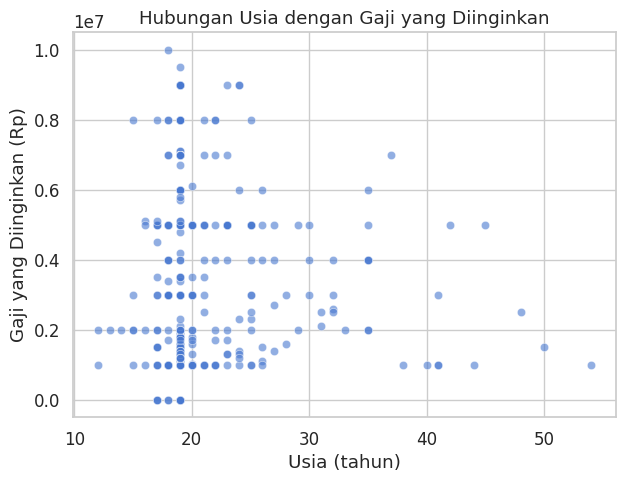

In [13]:
df1_clean = df1.copy()
df1_clean["Usia/Umur"] = data1_clean["Usia/Umur"].astype(str).str.extract("(\d+)").astype(float)

plt.figure(figsize=(7,5))
sns.scatterplot(data=df1_clean, x="Usia/Umur", y="Gaji Yang Anda Inginkan", alpha=0.6)
plt.title("Hubungan Usia dengan Gaji yang Diinginkan")
plt.xlabel("Usia (tahun)")
plt.ylabel("Gaji yang Diinginkan (Rp)")
plt.show()

#10. Perbandingan Gender terhadap Gaji yang Diinginkan

Kode ini membuat boxplot untuk membandingkan gaji yang diinginkan berdasarkan jenis kelamin. Dengan visualisasi ini, kita bisa melihat persebaran data, nilai tengah, dan potensi perbedaan rata-rata gaji yang diharapkan antara responden laki-laki dan perempuan

/tmp/ipython-input-2149084983.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data1_clean, x="Jenis Kelamin", y="Gaji Yang Anda Inginkan", palette="pastel")


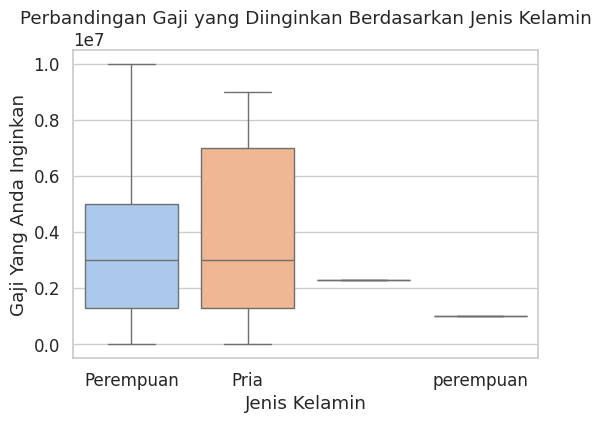

In [14]:
plt.figure(figsize=(6,4))
sns.boxplot(data=data1_clean, x="Jenis Kelamin", y="Gaji Yang Anda Inginkan", palette="pastel")
plt.title("Perbandingan Gaji yang Diinginkan Berdasarkan Jenis Kelamin")
plt.show()

#11. Hasil Akhir

In [2]:

print("====================================")
print("HASIL AKHIR EDA GABUNGAN")
print("====================================\n")

print("1️. Struktur Data:")
print("- Dataset 1 (Survei) berisi preferensi dan minat kerja individu.")
print("- Dataset 2 (JobStreet) berisi data lowongan kerja aktual di pasar.\n")

print("2️. Kualitas Data:")
print("- Sebagian kecil kolom di dataset1 memiliki nilai kosong (misalnya nama/hobi).")
print("- Dataset2 relatif bersih dan konsisten.\n")

print("3️. Analisis Gaji:")
print("- Rata-rata gaji yang diinginkan responden lebih tinggi dibandingkan gaji minimum yang ditawarkan.")
print("- Distribusi gaji responden cenderung lebar, menunjukkan variasi besar dalam ekspektasi.\n")

print("4️. Bidang Pekerjaan:")
print("- Responden paling banyak tertarik pada bidang Teknologi, Akademik, dan Seni.")
print("- Sedangkan di JobStreet, kategori dominan adalah IT, Pendidikan, dan SDM/Personalia.")
print(" Artinya, minat masyarakat relatif sesuai dengan tren pasar kerja.\n")

print("5️. Lokasi Pekerjaan:")
print("- Sebagian besar responden memilih bekerja di kota.")
print("- Lowongan kerja juga paling banyak terdapat di Jakarta, Surabaya, dan Bandung.")
print(" Preferensi lokasi masyarakat sejalan dengan konsentrasi lowongan di kota besar.\n")

print("6️. Usia & Gaji:")
print("- Tidak ada korelasi kuat antara usia dan gaji yang diinginkan.")
print("- Baik responden muda maupun tua memiliki ekspektasi gaji yang beragam.\n")

print("7️. Gender & Gaji:")
print("- Boxplot menunjukkan median gaji diinginkan antar gender relatif seimbang.")
print("- Tidak ada perbedaan signifikan secara visual.\n")

print("8️. Word Cloud JobStreet:")
print("- Kata dominan seperti 'pengalaman', 'kerja', 'teknologi', dan 'pendidikan' sering muncul.")
print("Ini menggambarkan tren kebutuhan industri yang fokus pada skill dan pengalaman.\n")

print("KESIMPULAN UMUM:")
print("Secara keseluruhan, ekspektasi masyarakat terhadap bidang, lokasi, dan gaji relatif sejalan dengan kondisi pasar kerja.")
print("Namun, terdapat gap kecil pada ekspektasi gaji yang sedikit lebih tinggi dibandingkan realita pasar.\n")

HASIL AKHIR EDA GABUNGAN

1️. Struktur Data:
- Dataset 1 (Survei) berisi preferensi dan minat kerja individu.
- Dataset 2 (JobStreet) berisi data lowongan kerja aktual di pasar.

2️. Kualitas Data:
- Sebagian kecil kolom di dataset1 memiliki nilai kosong (misalnya nama/hobi).
- Dataset2 relatif bersih dan konsisten.

3️. Analisis Gaji:
- Rata-rata gaji yang diinginkan responden lebih tinggi dibandingkan gaji minimum yang ditawarkan.
- Distribusi gaji responden cenderung lebar, menunjukkan variasi besar dalam ekspektasi.

4️. Bidang Pekerjaan:
- Responden paling banyak tertarik pada bidang Teknologi, Akademik, dan Seni.
- Sedangkan di JobStreet, kategori dominan adalah IT, Pendidikan, dan SDM/Personalia.
 Artinya, minat masyarakat relatif sesuai dengan tren pasar kerja.

5️. Lokasi Pekerjaan:
- Sebagian besar responden memilih bekerja di kota.
- Lowongan kerja juga paling banyak terdapat di Jakarta, Surabaya, dan Bandung.
 Preferensi lokasi masyarakat sejalan dengan konsentrasi lowongan